In [1]:
# 0. 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/H2GTRM.TTF' # 윈도우 os font 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font',family=font_name)



In [3]:
# 1. 데이터 로드
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# 기본 정보
print(df.shape)
print(df.dtypes.value_counts())
print("결측치:\n", df.isnull().sum()) # 결측치 계산
print("중복 데이터 수:", df.duplicated().sum())  # 중복 데이터 계산


(1470, 35)
int64     26
object     9
Name: count, dtype: int64
결측치:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
Y

In [4]:
# 2. 수치형 변수 통계 요약
num_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears']
print(df[num_cols].describe())


               Age  MonthlyIncome  YearsAtCompany  TotalWorkingYears
count  1470.000000    1470.000000     1470.000000        1470.000000
mean     36.923810    6502.931293        7.008163          11.279592
std       9.135373    4707.956783        6.126525           7.780782
min      18.000000    1009.000000        0.000000           0.000000
25%      30.000000    2911.000000        3.000000           6.000000
50%      36.000000    4919.000000        5.000000          10.000000
75%      43.000000    8379.000000        9.000000          15.000000
max      60.000000   19999.000000       40.000000          40.000000


In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# 3. 범주형 변수 분포 및 이탈률
cat_cols = ['OverTime', 'JobRole', 'BusinessTravel']
for col in cat_cols:
    print(f"==== {col} 분포 ====")
    print(df[col].value_counts(normalize=True) * 100)

    print(f"\n{col} vs Attrition 이탈률 (%):")
    print(pd.crosstab(df[col], df['Attrition'], normalize='index') * 100)


==== OverTime 분포 ====
OverTime
No     71.70068
Yes    28.29932
Name: proportion, dtype: float64

OverTime vs Attrition 이탈률 (%):
Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846
==== JobRole 분포 ====
JobRole
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: proportion, dtype: float64

JobRole vs Attrition 이탈률 (%):
Attrition                         No        Yes
JobRole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturin

                      MonthlyIncome  TotalWorkingYears  YearsAtCompany  \
MonthlyIncome              1.000000           0.772893        0.514285   
TotalWorkingYears          0.772893           1.000000        0.628133   
YearsAtCompany             0.514285           0.628133        1.000000   
YearsWithCurrManager       0.344079           0.459188        0.769212   

                      YearsWithCurrManager  
MonthlyIncome                     0.344079  
TotalWorkingYears                 0.459188  
YearsAtCompany                    0.769212  
YearsWithCurrManager              1.000000  


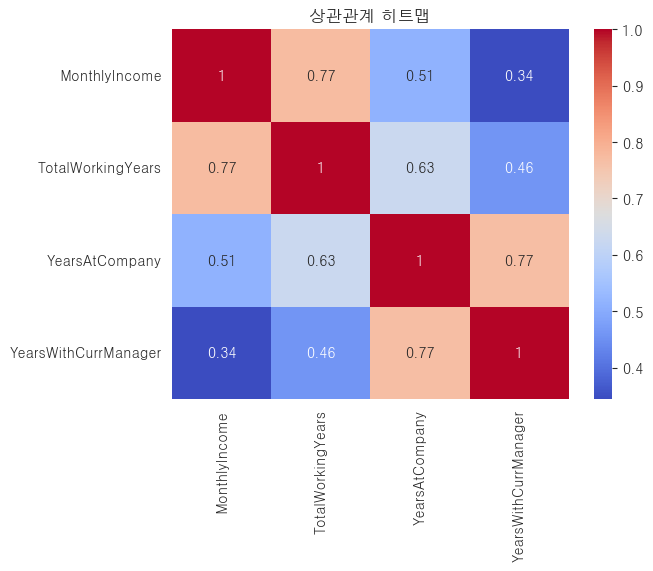

In [8]:
cols = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']
print(df[cols].corr())

sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()


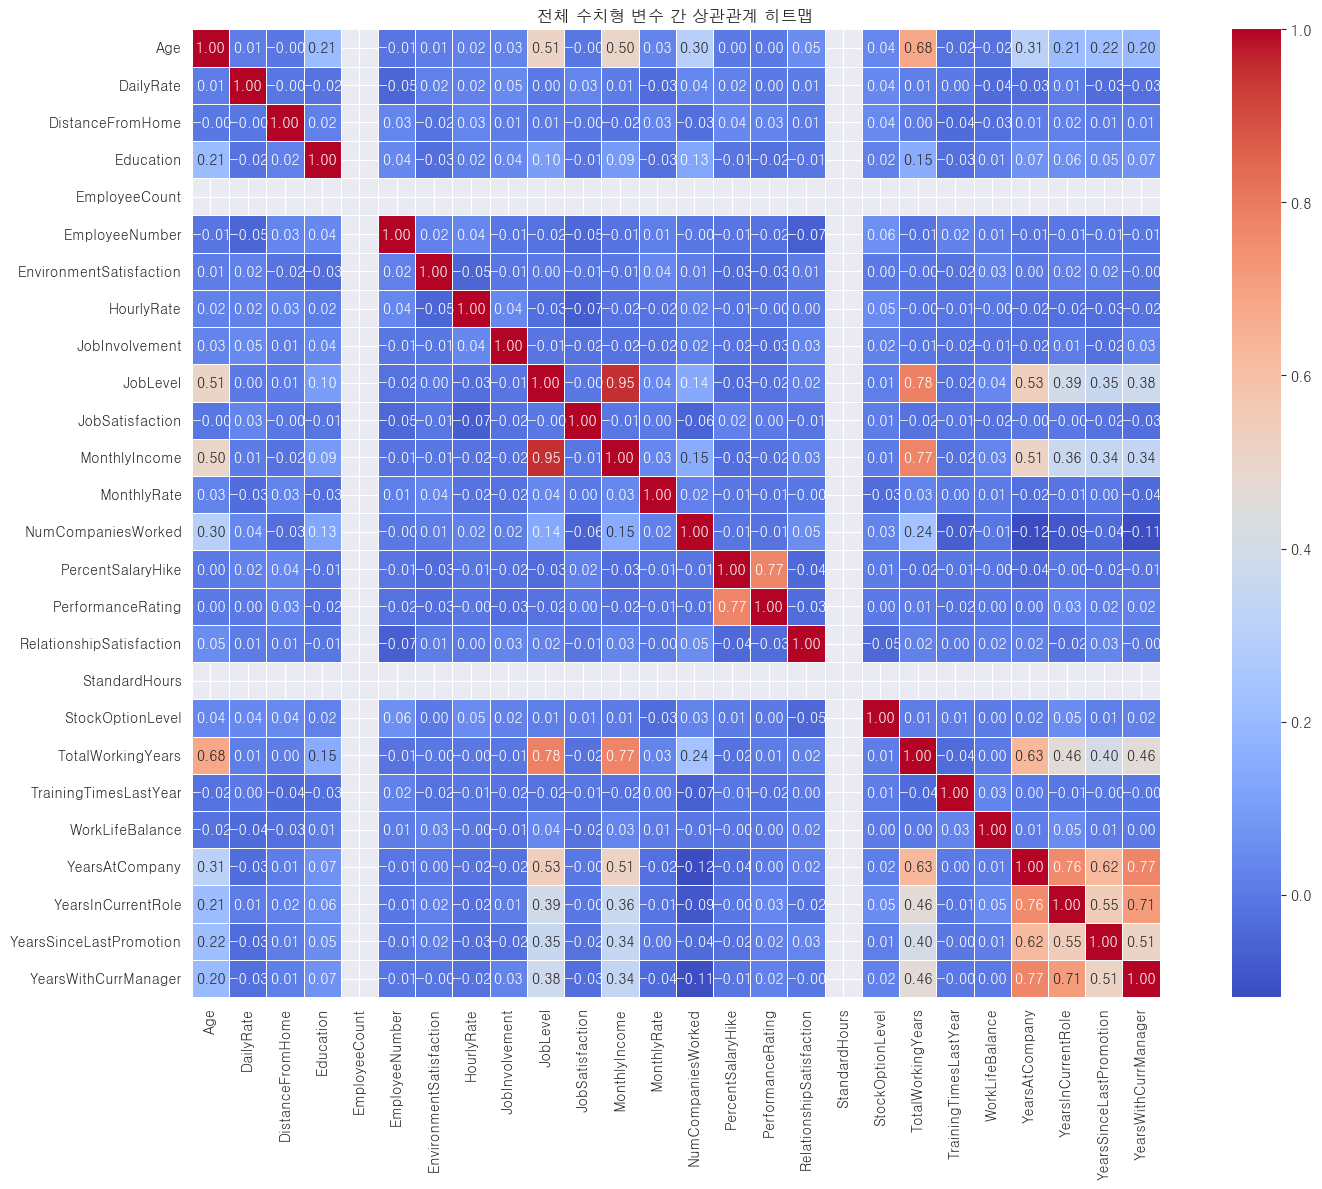

In [9]:
# 수치형 변수 상관관계 계산
corr_matrix = df.corr(numeric_only=True)

# 히트맵 시각화
plt.figure(figsize=(16, 12))  # 크기 조정
sns.heatmap(corr_matrix,
            annot=True,        # 값 표시
            fmt='.2f',         # 소수점 둘째 자리
            cmap='coolwarm',   # 색상
            linewidths=0.5,    # 셀 경계선
            square=True)
plt.title('전체 수치형 변수 간 상관관계 히트맵')
plt.tight_layout()
plt.show()

In [10]:
# 6. 파생변수 생성
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '56+'])
df['IncomeGroup'] = pd.cut(
    df['MonthlyIncome'],
    bins=[0, 4000, 8000, 12000, 16000, df['MonthlyIncome'].max()],
    labels=['0-4000', '4000-8000', '8000-12000', '12000-16000', '16000+']
)
df['TotalWorkingYearsGroup'] = pd.cut(
    df['TotalWorkingYears'],
    bins=[-1, 8, 16, 24, 32, df['TotalWorkingYears'].max()],
    labels=['0-8', '8-16', '16-24', '24-32', '32+']
)
df['YearsAtCompanyGroup'] = pd.cut(
    df['YearsAtCompany'],
    bins=[-1, 8, 16, 24, 32, df['YearsAtCompany'].max()],
    labels=['0-8', '8-16', '16-24', '24-32', '32+']
)



Attrition         No        Yes
AgeGroup                       
18-25      64.227642  35.772358
26-35      80.858086  19.141914
36-45      90.811966   9.188034
46-55      88.495575  11.504425
56+        82.978723  17.021277


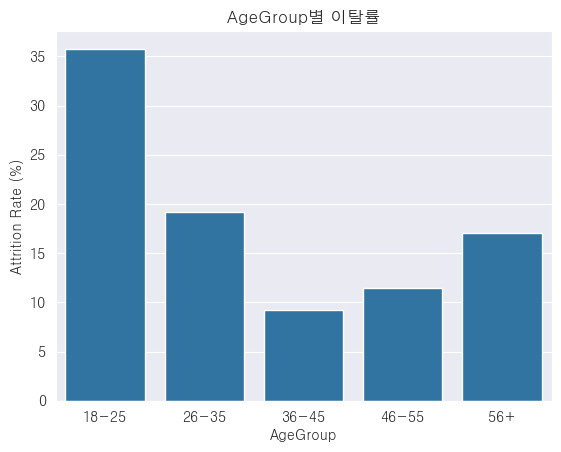

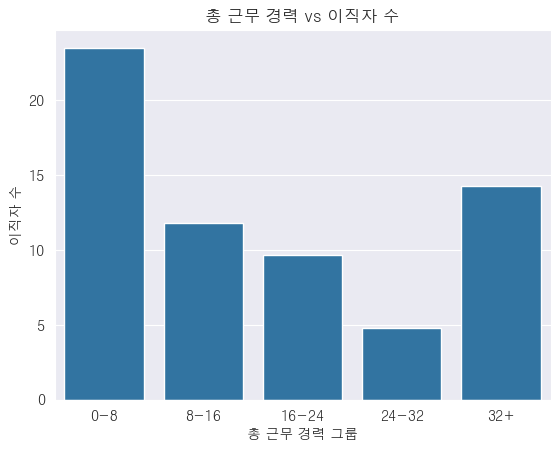

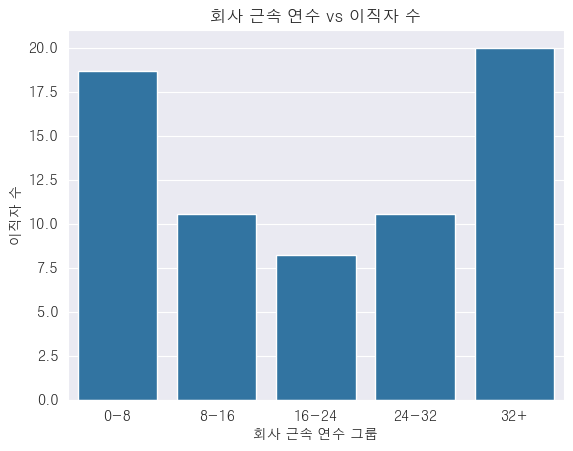

In [11]:
# 7. 파생변수 기반 이탈률 분석
print(pd.crosstab(df['AgeGroup'], df['Attrition'], normalize='index') * 100)

sns.barplot(data=pd.crosstab(df['AgeGroup'], df['Attrition'], normalize='index') * 100,
            x='AgeGroup', y='Yes')
plt.title('AgeGroup별 이탈률')
plt.ylabel('Attrition Rate (%)')
plt.show()

sns.barplot(data=pd.crosstab(df['TotalWorkingYearsGroup'], df['Attrition'], normalize='index') * 100,
            x='TotalWorkingYearsGroup', y='Yes')
plt.title('총 근무 경력 vs 이직자 수')
plt.xlabel('총 근무 경력 그룹')
plt.ylabel('이직자 수')
plt.show()

sns.barplot(data=pd.crosstab(df['YearsAtCompanyGroup'], df['Attrition'], normalize='index') * 100, x='YearsAtCompanyGroup',y='Yes')
plt.title('회사 근속 연수 vs 이직자 수')
plt.xlabel('회사 근속 연수 그룹')
plt.ylabel('이직자 수')
plt.show()


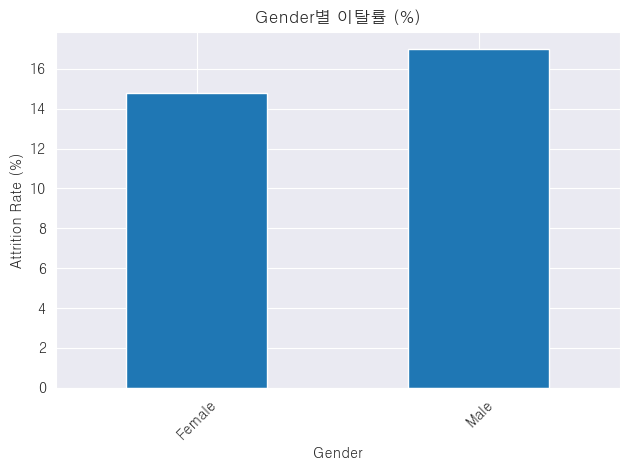

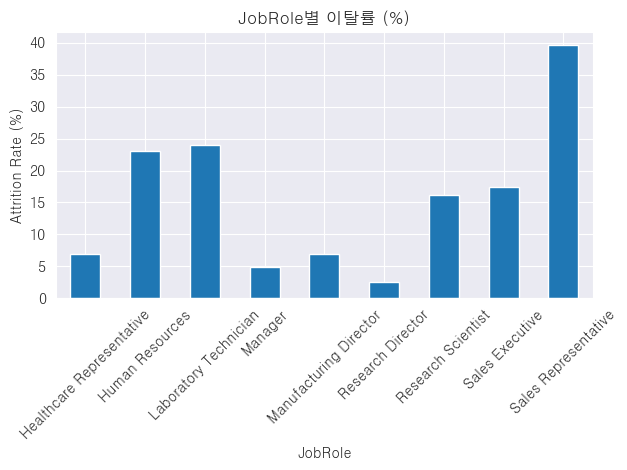

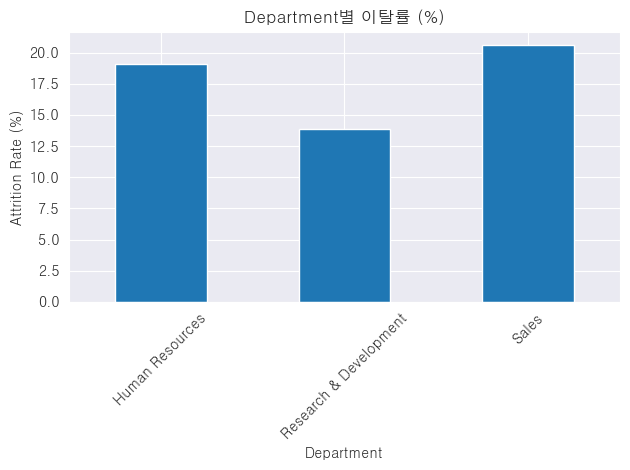

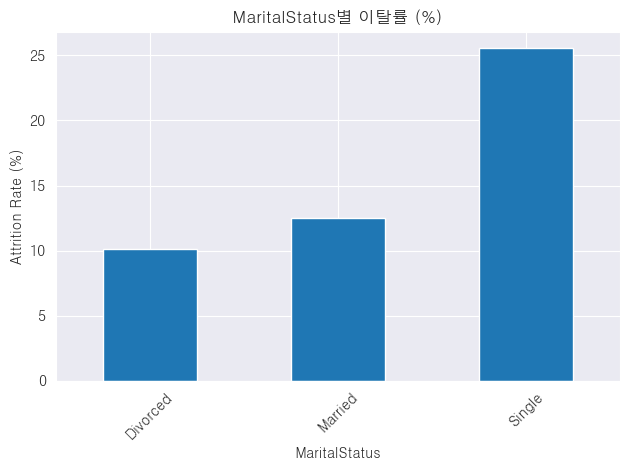

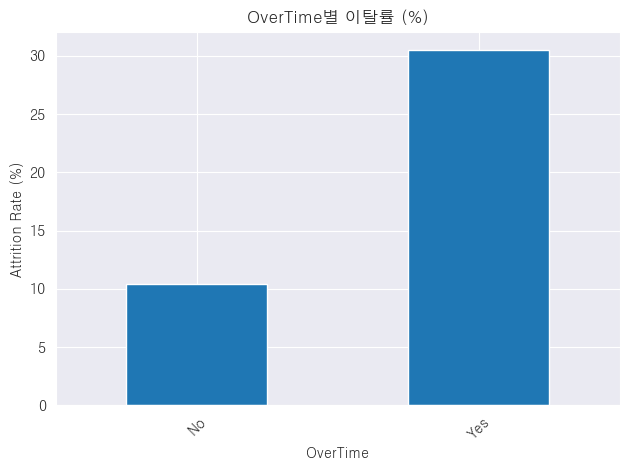

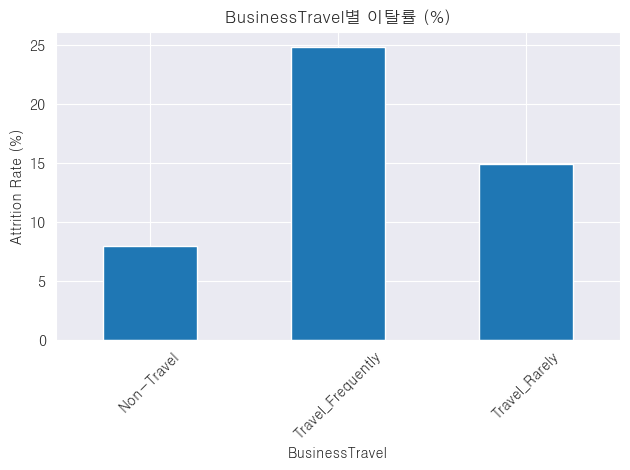

In [12]:
# 범주형 변수 목록
cat_cols = ['Gender', 'JobRole', 'Department', 'MaritalStatus', 'OverTime', 'BusinessTravel']

# 각 범주형 변수에 대해 이탈률 시각화
for col in cat_cols:
    ctab = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
    ctab[['Yes']].plot(kind='bar', legend=False)
    plt.title(f'{col}별 이탈률 (%)')
    plt.ylabel('Attrition Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [13]:
imp_col = ['OverTime', 'JobRole', 'IncomeGroup', 'YearsAtCompanyGroup',
           'TotalWorkingYearsGroup', 'MaritalStatus', 'BusinessTravel','AgeGroup']

summary = {}
for col in imp_col:
    tab = pd.crosstab(df[col], df['Attrition'])

    # 총 인원 수 계산
    tab['총 인원 수'] = tab.sum(axis=1)

    # 이직률 계산
    tab['이직률(%)'] = (tab['Yes'] / tab['총 인원 수'] * 100).round(2)

    # 열 순서 정리 및 이름 변경
    tab = tab[['총 인원 수', 'Yes', 'No', '이직률(%)']]
    tab.columns = ['총 인원 수', '이직자 수', '잔류자 수', '이직률(%)']

    # 결과 저장 및 출력
    summary[col] = tab
    print(f"\n {col}에 따른 이직 현황 요약:")
    display(summary[col])


print("\n[인사이트 요약]")
print("- OverTime = Yes인 직원의 이탈률이 매우 높음")
print("- Sales, Human Resources, Laboratary 직군의 이탈률이 상대적으로 높음")
print("- 미혼자들이 상대적으로 이탈률 높음")
print("- 출장을 많이 갈 수록 이탈률 높음")
print("- 수입이 적을 수록 이탈률 높음")
print("- 근속 연수나 근무 경력이 낮을 수록 이탈률 높음")
print("- 20~30대에서 이탈률 높음") # 나이가 많은 층에서도 이탈률이 높긴 하지만 여긴 표본이 적어서 애매함




 OverTime에 따른 이직 현황 요약:


,총 인원 수,이직자 수,잔류자 수,이직률(%)
OverTime,,,,
No,1054,110,944,10.44
Yes,416,127,289,30.53



 JobRole에 따른 이직 현황 요약:


,총 인원 수,이직자 수,잔류자 수,이직률(%)
JobRole,,,,
Healthcare Representative,131,9,122,6.87
Human Resources,52,12,40,23.08
Laboratory Technician,259,62,197,23.94
Manager,102,5,97,4.90
Manufacturing Director,145,10,135,6.90
Research Director,80,2,78,2.50
Research Scientist,292,47,245,16.10
Sales Executive,326,57,269,17.48
Sales Representative,83,33,50,39.76



 IncomeGroup에 따른 이직 현황 요약:


,총 인원 수,이직자 수,잔류자 수,이직률(%)
IncomeGroup,,,,
0-4000,543,137,406,25.23
4000-8000,546,60,486,10.99
8000-12000,186,29,157,15.59
12000-16000,69,6,63,8.70
16000+,126,5,121,3.97



 YearsAtCompanyGroup에 따른 이직 현황 요약:


,총 인원 수,이직자 수,잔류자 수,이직률(%)
YearsAtCompanyGroup,,,,
0-8,1022,191,831,18.69
8-16,322,34,288,10.56
16-24,97,8,89,8.25
24-32,19,2,17,10.53
32+,10,2,8,20.00



 TotalWorkingYearsGroup에 따른 이직 현황 요약:


,총 인원 수,이직자 수,잔류자 수,이직률(%)
TotalWorkingYearsGroup,,,,
0-8,625,147,478,23.52
8-16,526,62,464,11.79
16-24,207,20,187,9.66
24-32,84,4,80,4.76
32+,28,4,24,14.29



 MaritalStatus에 따른 이직 현황 요약:


,총 인원 수,이직자 수,잔류자 수,이직률(%)
MaritalStatus,,,,
Divorced,327,33,294,10.09
Married,673,84,589,12.48
Single,470,120,350,25.53



 BusinessTravel에 따른 이직 현황 요약:


,총 인원 수,이직자 수,잔류자 수,이직률(%)
BusinessTravel,,,,
Non-Travel,150,12,138,8.00
Travel_Frequently,277,69,208,24.91
Travel_Rarely,1043,156,887,14.96



 AgeGroup에 따른 이직 현황 요약:


,총 인원 수,이직자 수,잔류자 수,이직률(%)
AgeGroup,,,,
18-25,123,44,79,35.77
26-35,606,116,490,19.14
36-45,468,43,425,9.19
46-55,226,26,200,11.50
56+,47,8,39,17.02



[인사이트 요약]
- OverTime = Yes인 직원의 이탈률이 매우 높음
- Sales, Human Resources, Laboratary 직군의 이탈률이 상대적으로 높음
- 미혼자들이 상대적으로 이탈률 높음
- 출장을 많이 갈 수록 이탈률 높음
- 수입이 적을 수록 이탈률 높음
- 근속 연수나 근무 경력이 낮을 수록 이탈률 높음
- 20~30대에서 이탈률 높음


In [15]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,IncomeGroup,TotalWorkingYearsGroup,YearsAtCompanyGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,36-45,4000-8000,0-8,0-8
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,46-55,4000-8000,8-16,8-16
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,36-45,0-4000,0-8,0-8
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,26-35,0-4000,0-8,0-8
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,26-35,0-4000,0-8,0-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,3,5,2,0,3,36-45,0-4000,16-24,0-8
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,5,3,7,7,1,7,36-45,8000-12000,8-16,0-8
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,0,3,6,2,0,3,26-35,4000-8000,0-8,0-8
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,3,2,9,6,0,8,46-55,4000-8000,16-24,8-16
